In [2]:
#Classificador Linear e Dense Neural Network Classifier
import pandas as pd
diabetes= pd.read_csv('dados/pima-indians-diabetes.csv')

In [3]:
#vendo os atributos
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
#Normalizando algumas colunas usando o Pandas (preciso entender o que ele fez)
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min() ))

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
import tensorflow as tf

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

In [8]:
#Pegando as colunas e seus tipos (tipos continuos)
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
#Pegando as colunas com seus tipos categoricos usando lista de vocabularios
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [10]:
#Pegando as colunas com seus tipos categoricos usando hash_bucket (aqui como se fosse o de cima, mas automatico)
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [11]:
#Mudando continuo para categorico
import matplotlib.pyplot as plt
%matplotlib inline

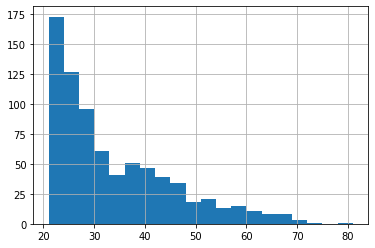

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
#Usando intervalos na mudanca de tipo de numerico para categorico usando buckets
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [14]:
#juntando tudo
feat_cols = [num_preg, plasma_gluc,dias_press,tricep, insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [15]:
#Train test split
x_data = diabetes.drop('Class',axis=1)

In [16]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [17]:
labels = diabetes['Class']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)
input_func  = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [20]:
#Usando o classificador linear
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmp9gy49y2c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2e6a5210>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
#Treinando o modelo
model.train(input_fn=input_func,steps=1000)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmp9gy49y2c/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 194.162
INFO:tensorflow:loss = 6.5553102, step = 101 (0.521 sec)
INFO:tensorflow:global_step/sec: 340.97
INFO:tensorflow:loss = 4.7796383, step = 201 (0

In [22]:
#Validando
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-21T11:35:27Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmp9gy49y2c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-21-11:35:28
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.78460324, auc_precision_recall = 0.62454057, average_loss = 0.5368547, global_step = 1000, label/mean = 0.34251967, loss = 5.244657, precision = 0.5862069, prediction/mean = 0.3890995, recall = 0.5862069
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/6_/

In [23]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78460324,
 'auc_precision_recall': 0.62454057,
 'average_loss': 0.5368547,
 'label/mean': 0.34251967,
 'loss': 5.244657,
 'precision': 0.5862069,
 'prediction/mean': 0.3890995,
 'recall': 0.5862069,
 'global_step': 1000}

In [24]:
#Fazendo algumas predições
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [25]:
predictions = model.predict(pred_input_func)

In [26]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmp9gy49y2c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [27]:
my_pred

[{'logits': array([0.22416008], dtype=float32),
  'logistic': array([0.5558065], dtype=float32),
  'probabilities': array([0.44419345, 0.5558065 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.6341624], dtype=float32),
  'logistic': array([0.65343267], dtype=float32),
  'probabilities': array([0.3465673 , 0.65343267], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.27318108], dtype=float32),
  'logistic': array([0.4321263], dtype=float32),
  'probabilities': array([0.5678737 , 0.43212634], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.68029875], dtype=float32),
  'logistic': array([0.33619463], dtype=float32),
  'probabilities': array([0.66380537, 0.33619463], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7276046], dtype=float32),
  'logistic':

In [28]:
#Dense neural classifier
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmp_wbbe3fp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2ea5b5d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [30]:
feat_cols = [num_preg, plasma_gluc,dias_press,tricep, insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpzqe4p90a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a33467f10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpzqe4p90a/model.ckpt.
INFO:tensorflow:loss = 6.4436994, step = 1
INFO:tensorflow:global_step/sec: 194.315
INFO:tensorflow:loss = 5.758569, step = 101 (0.516 sec)
INFO:tensorflow:global_step/sec: 317.727
INFO:tensorflow:loss = 4.6009345, step = 201 (0.317 sec)
INFO:tensorflow:global_step/sec: 141.969
INFO:tensorflow:loss = 3.097493, step = 301 (0.702 sec)
INFO:tensorflow:global_step/sec: 300.872
INFO:tensorflow:loss = 3.1976507, step = 401 (0.332 sec)
INFO:tensorflow:global_step/sec: 324.131
INFO:tensorflow:loss = 5.5148706, step = 501 (0.309 sec)
INFO:tensorflow:global_step/sec: 303.107
INFO:tensorflow:loss = 2.5613945, step = 601 (0.330 sec)
INFO:tensorflow

In [38]:
#Validando 
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [39]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-21T12:04:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpzqe4p90a/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-21-12:04:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7598425, accuracy_baseline = 0.65748036, auc = 0.81980866, auc_precision_recall = 0.6786901, average_loss = 0.5024862, global_step = 1000, label/mean = 0.34251967, loss = 4.908904, precision = 0.63, prediction/mean = 0.39906096, recall = 0.7241379
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpzqe4p90a/model.ckpt-1000


{'accuracy': 0.7598425,
 'accuracy_baseline': 0.65748036,
 'auc': 0.81980866,
 'auc_precision_recall': 0.6786901,
 'average_loss': 0.5024862,
 'label/mean': 0.34251967,
 'loss': 4.908904,
 'precision': 0.63,
 'prediction/mean': 0.39906096,
 'recall': 0.7241379,
 'global_step': 1000}